<a href="https://colab.research.google.com/github/rishi-29-02/Stock-Price-Analysis/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 

## **Data visulization and Technical Analysis**

# 2.1 Load CSV into a Dataframe

Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.

In [50]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
#from google.colab import files
#uploaded = files.upload()

In [52]:
data = pd.read_csv('Module_1_Solutions.csv')
data

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,0,HINDUNILVR,EQ,2017-05-15,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
1,1,HINDUNILVR,EQ,2017-05-16,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,1.744216,Positive
2,2,HINDUNILVR,EQ,2017-05-17,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.899640,Slight positive
3,3,HINDUNILVR,EQ,2017-05-18,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-1.897167,Negative
4,4,HINDUNILVR,EQ,2017-05-19,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,1.792477,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,HINDUNILVR,EQ,2019-05-07,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1493.746449,1.713704,Positive
490,491,HINDUNILVR,EQ,2019-05-08,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,1494.119209,-0.518409,Slight negative
491,492,HINDUNILVR,EQ,2019-05-09,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,1494.506954,0.891218,Slight positive
492,493,HINDUNILVR,EQ,2019-05-10,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,1494.802870,-0.956713,Slight negative


In [53]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,HINDUNILVR,EQ,2017-05-15,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
1,HINDUNILVR,EQ,2017-05-16,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,1.744216,Positive
2,HINDUNILVR,EQ,2017-05-17,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.899640,Slight positive
3,HINDUNILVR,EQ,2017-05-18,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-1.897167,Negative
4,HINDUNILVR,EQ,2017-05-19,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,1.792477,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HINDUNILVR,EQ,2019-05-07,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1493.746449,1.713704,Positive
490,HINDUNILVR,EQ,2019-05-08,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,1494.119209,-0.518409,Slight negative
491,HINDUNILVR,EQ,2019-05-09,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,1494.506954,0.891218,Slight positive
492,HINDUNILVR,EQ,2019-05-10,1703.75,1708.95,1709.00,1678.50,1686.00,1687.45,1694.39,1000696,1.695567e+09,98364,581135,58.07,5,2019,1494.802870,-0.956713,Slight negative


In [54]:
data.Date.dtype

dtype('O')

As the Date feature is of object type and therefore changing it to datetime64(ns). 

In [55]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.Date.dtype

dtype('<M8[ns]')

In [56]:
data.set_index('Date', inplace=True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,HINDUNILVR,EQ,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
2017-05-16,HINDUNILVR,EQ,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,1.744216,Positive
2017-05-17,HINDUNILVR,EQ,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.899640,Slight positive
2017-05-18,HINDUNILVR,EQ,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-1.897167,Negative
2017-05-19,HINDUNILVR,EQ,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,1.792477,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HINDUNILVR,EQ,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1493.746449,1.713704,Positive
2019-05-08,HINDUNILVR,EQ,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,1494.119209,-0.518409,Slight negative
2019-05-09,HINDUNILVR,EQ,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,1494.506954,0.891218,Slight positive


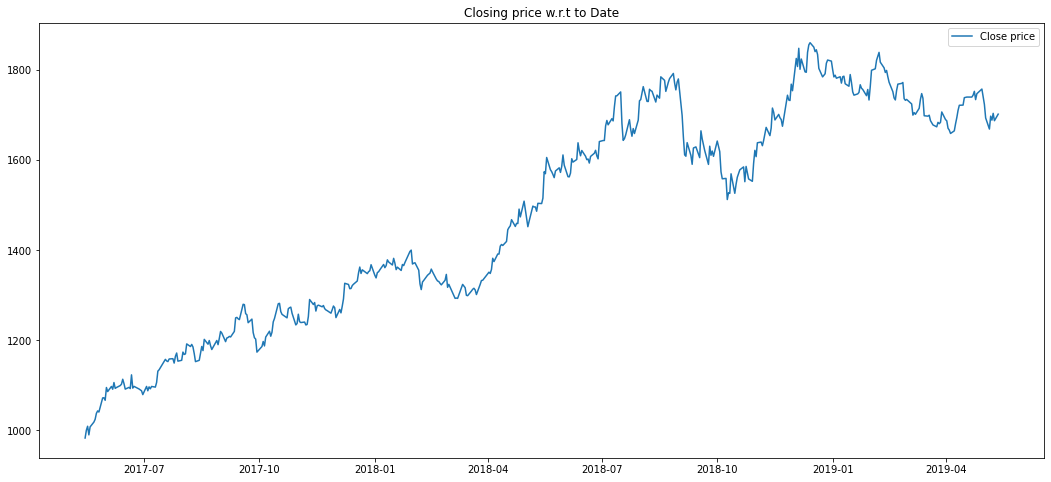

In [57]:
plt.figure(figsize=(18, 8))
plt.plot(data['Close Price'], label='Close price')
plt.title('Closing price w.r.t to Date')
plt.legend()
plt.show()

Fetching out the top 5 Days in which the change in the close Price is drastic.

In [58]:
Change_in_stock = data['Close Price'].diff().abs().sort_values(ascending=False)
Change_in_stock.head(5)

Date
2018-09-03    81.00
2018-12-03    71.60
2018-07-17    69.55
2018-11-26    68.90
2018-09-18    59.50
Name: Close Price, dtype: float64

Scraping the news of the above days from the websites.

In [59]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables

print('News on 2018-09-03 is not avaliable.\n')
print('\n*********************************************************************************************************\n')

print('\nNews on 2018-03-12 :\n')
url_2018_03_12 = 'https://www.moneycontrol.com/news/business/hul-board-apporves-merger-with-glaxosmithkline-consumer-healthcare-3245961.html'
r = requests.get(url_2018_03_12)
soup = BeautifulSoup(r.content,"html.parser")

print('\nTitle :\n')
print(soup.title.get_text())

print('\nSubtitle :\n')
metas = soup.find_all('meta') #Get Meta Description
for m in metas:
    if m.get ('name') == 'description':
        print(m.get('content'))

print('\nReport : \n')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print (stock_news_body_container.select_one("p:nth-of-type(3)").text)
print (stock_news_body_container.select_one("p:nth-of-type(4)").text)
print (stock_news_body_container.select_one("p:nth-of-type(5)").text)
print (stock_news_body_container.select_one("p:nth-of-type(6)").text)
print (stock_news_body_container.select_one("p:nth-of-type(7)").text)

print('\n*********************************************************************************************************\n')
print('\nNews on 2018-07-17 :\n')
url_2018_07_17 = 'https://www.moneycontrol.com/news/business/stocks/hold-hindustan-unilever-target-of-rs-1703-prabhudas-lilladher-2723571.html'
r = requests.get(url_2018_07_17)
soup = BeautifulSoup(r.content, 'html.parser')

print('\nTitle :\n')
print(soup.title.get_text())

print('\nSubtitle :\n')
metas = soup.find_all('meta')
for m in metas:
  if m.get('name')=='description':
    print(m.get('content'))

print('\nReport :\n')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print('\n*********************************************************************************************************\n')
print('\nNews on 2018-11-26 :\n')
url_2018_11_26 = 'https://www.moneycontrol.com/news/business/companies/why-are-fmcg-companies-turning-to-e-commerce-portals-for-product-launches-3219591.html'
r = requests.get(url_2018_11_26)
soup = BeautifulSoup(r.content, 'html.parser')

print('\nTitle :\n')
print(soup.title.get_text())

print('\nSubtitle :\n')
metas = soup.find_all('meta')
for m in metas:
  if m.get('name')=='description':
    print(m.get('content'))

print('\nReport :\n')
info = soup.findAll('script',attrs={'type':"application/ld+json"})[2].text.strip()
print(info)

print('\n*********************************************************************************************************\n')
print('\nNews on 2018-09-18 :\n')
url_2018_09_18 = 'https://www.moneycontrol.com/news/business/stocks/buy-hindustan-unilever-target-of-rs-2025-motilal-oswal-2960631.html'
r = requests.get(url_2018_09_18)
soup = BeautifulSoup(r.content, 'html.parser')

print('\nTitle :\n')
print(soup.title.get_text())

print('\nSubtitle :\n')
metas = soup.find_all('meta')
for m in metas:
  if m.get('name')=='description':
    print(m.get('content'))

print('\nReport :\n')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print (stock_news_body_container.select_one("p:nth-of-type(3)").text)
print (stock_news_body_container.select_one("p:nth-of-type(4)").text)

News on 2018-09-03 is not avaliable.


*********************************************************************************************************


News on 2018-03-12 :


Title :

HUL Board Apporves Merger With GlaxoSmithKline Consumer Healthcare

Subtitle :

The transaction is an all equity merger with 4.39 shares of HUL being allotted for every share in GSKCH India, which sells consumer healthcare prodcts, including popular drink brand Horlicks.

Report : 

The transaction is an all equity merger with 4.39 shares of HUL being allotted for every share in GSKCH India, which sells consumer healthcare prodcts, including popular drink brand Horlicks.
"HUL has reached a definite agreement with GSKCH India in this regard," the company said in a statement.
Commenting on the development, HUL CMD Sanjiv Mehta, Chairman and Managing Director said: With this proposed strategic merger with GSKCH India, we will be expanding our portfolio with great brands into a new category catering to the nutriti

#2.2 A Stem Plot

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

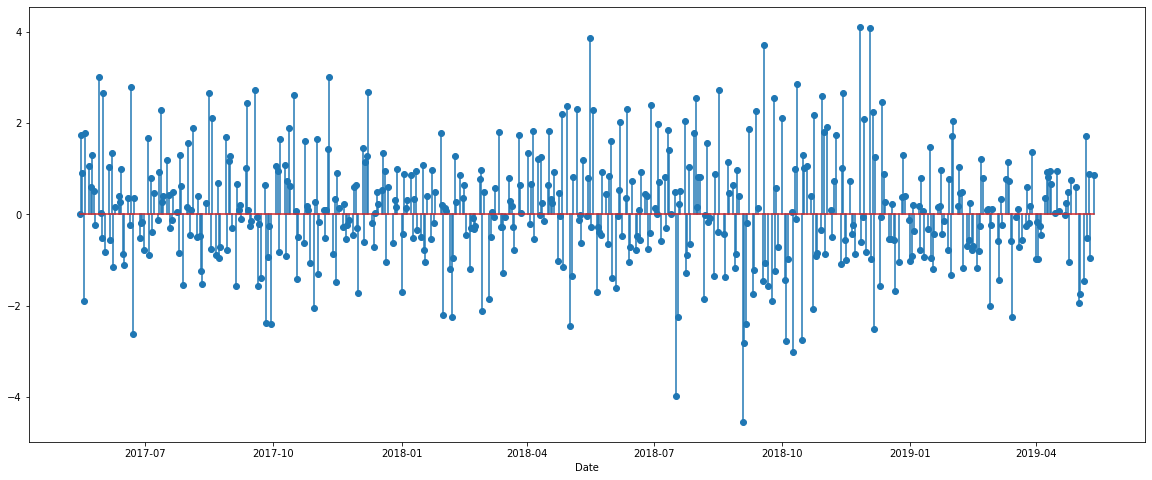

In [60]:
plt.figure(figsize=(20, 8))
plt.stem(data.index, data['Day_Perc_Change'])
plt.xlabel('Date')
plt.show()

#2.3 Volume Plot

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

Scaling the Total traded Quantity (Daily volume) feature by using the MinMaxscalar

In [61]:
from sklearn.preprocessing import MinMaxScaler

x = data['Total Traded Quantity'].values
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x.reshape(-1, 1))
data['Scaled_Total_traded_Quantity'] = pd.DataFrame(x_scaled, columns=['Total Traded Quantity'], index=data.index)
data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend,Scaled_Total_traded_Quantity
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,HINDUNILVR,EQ,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change,0.108912
2017-05-16,HINDUNILVR,EQ,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,1.744216,Positive,0.234613
2017-05-17,HINDUNILVR,EQ,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.899640,Slight positive,0.315580
2017-05-18,HINDUNILVR,EQ,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-1.897167,Negative,0.428567
2017-05-19,HINDUNILVR,EQ,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,1.792477,Positive,0.488834


Plotting Scaled Total Traded Quantity aka Daily volume.

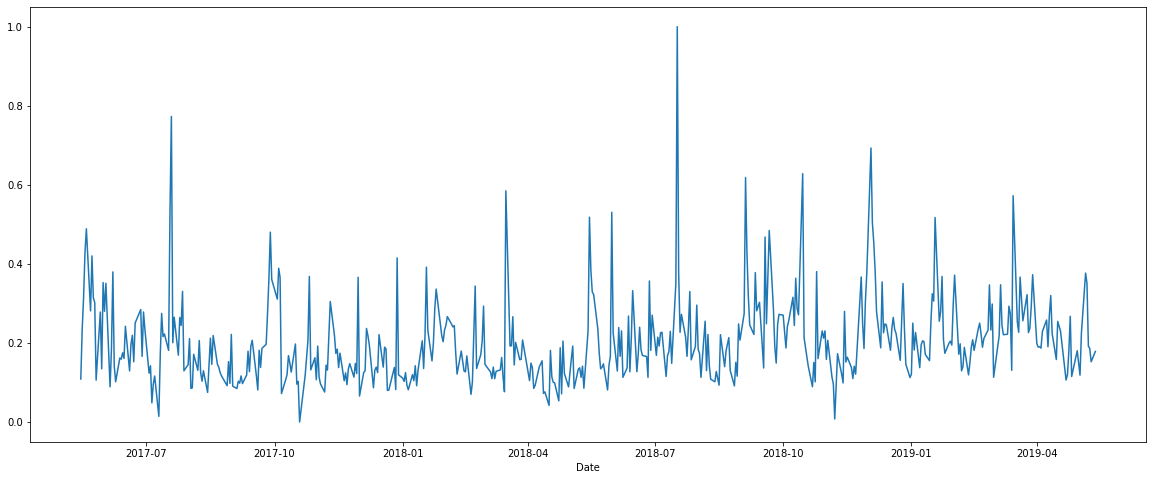

In [62]:
plt.figure(figsize=(20, 8))
plt.plot(data.index, data['Scaled_Total_traded_Quantity'])
plt.xlabel('Date')
plt.show() 

Comparing plot of daily volumes and comparing it with the stem plot of Day percentage change. 

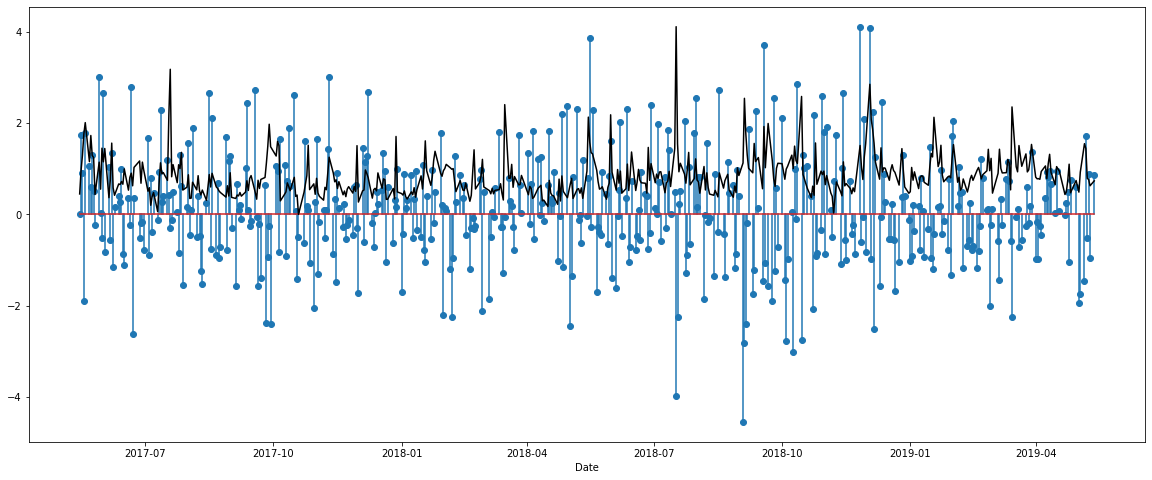

In [63]:
data['Scaled_volume'] = data['Scaled_Total_traded_Quantity'] * data['Day_Perc_Change'].max()
fig, ax = plt.subplots(figsize=(20, 8))
ax.stem(data.index, data['Day_Perc_Change'])
ax.plot(data.index, data['Scaled_volume'], 'k')
ax.set_xlabel('Date')
plt.show()

In [64]:
data.corr()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Scaled_Total_traded_Quantity,Scaled_volume
Prev Close,1.000000,0.999469,0.998473,0.998426,0.996999,0.997042,0.998135,0.161878,0.445106,0.468167,0.008202,-0.352709,-0.109982,0.828701,0.946006,-0.099621,0.161878,0.161878
Open Price,0.999469,1.000000,0.998626,0.998541,0.996934,0.997002,0.998238,0.164908,0.447774,0.468329,0.009225,-0.355974,-0.110743,0.828705,0.945761,-0.093087,0.164908,0.164908
High Price,0.998473,0.998626,1.000000,0.998502,0.998831,0.998880,0.999404,0.176692,0.459537,0.477172,0.013468,-0.369982,-0.102626,0.824445,0.944496,-0.055867,0.176692,0.176692
Low Price,0.998426,0.998541,0.998502,1.000000,0.998762,0.998855,0.999501,0.149153,0.433439,0.456308,0.000122,-0.347868,-0.116572,0.831608,0.945697,-0.056379,0.149153,0.149153
Last Price,0.996999,0.996934,0.998831,0.998762,1.000000,0.999909,0.999463,0.161957,0.445585,0.465205,0.007575,-0.357767,-0.105727,0.826044,0.944448,-0.024290,0.161957,0.161957
Close Price,0.997042,0.997002,0.998880,0.998855,0.999909,1.000000,0.999582,0.160434,0.444114,0.464735,0.006043,-0.358623,-0.106579,0.826612,0.944712,-0.023780,0.160434,0.160434
Average Price,0.998135,0.998238,0.999404,0.999501,0.999463,0.999582,1.000000,0.160999,0.444685,0.465542,0.005826,-0.358997,-0.108965,0.827811,0.945012,-0.042916,0.160999,0.160999
Total Traded Quantity,0.161878,0.164908,0.176692,0.149153,0.161957,0.160434,0.160999,1.000000,0.943334,0.731461,0.835640,-0.170436,-0.011566,0.139764,0.172289,-0.018152,1.000000,1.000000
Turnover,0.445106,0.447774,0.459537,0.433439,0.445585,0.444114,0.444685,0.943334,1.000000,0.806217,0.725072,-0.275547,-0.029264,0.368556,0.439639,-0.032269,0.943334,0.943334
No. of Trades,0.468167,0.468329,0.477172,0.456308,0.465205,0.464735,0.465542,0.731461,0.806217,1.000000,0.556548,-0.252407,-0.000602,0.389632,0.476838,-0.063339,0.731461,0.731461


***Analysis:***
From the second plot we can eaily infer that their is a negative correlation in between the two features daily volume and the Day percentage change. Our inference got strengthened by building the correlation matrix. Form the correlation matrix we got that the correlation in between the features is -0.018152.

#2.4 Pie Chart

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

Plotting the pie chart.

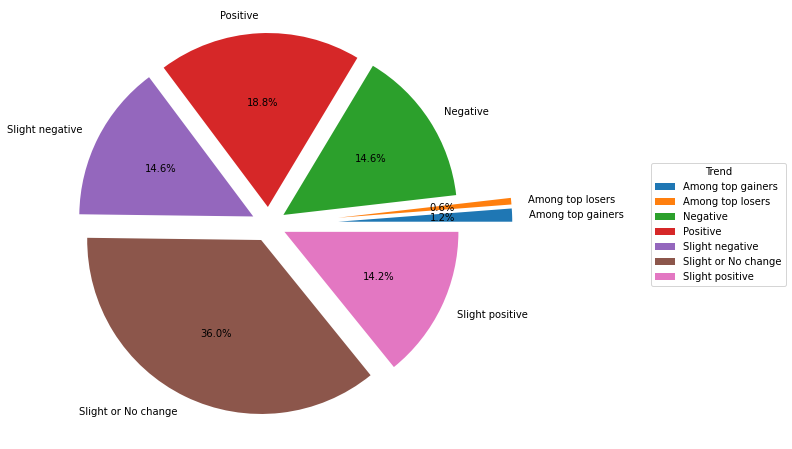

In [65]:
data_trend = data.groupby(['Trend'])
data_trend_keys = []
data_trend_values = []
for i in data_trend.groups.keys():
  data_trend_keys.append(i)
  data_trend_values.append(len(data_trend.groups[i]))

plt.figure(figsize=(8, 8))
plt.pie(data_trend_values, labels=data_trend_keys, autopct='%1.1f%%', explode=(0.4, 0.4, 0.1, 0.1,
                                                           0.1, 0.1, 0.1))
plt.legend(data_trend_keys,
           loc='right',
           title='Trend',
           bbox_to_anchor=(1.1, 0, 0.6, 1))
plt.show()

Bar Plot

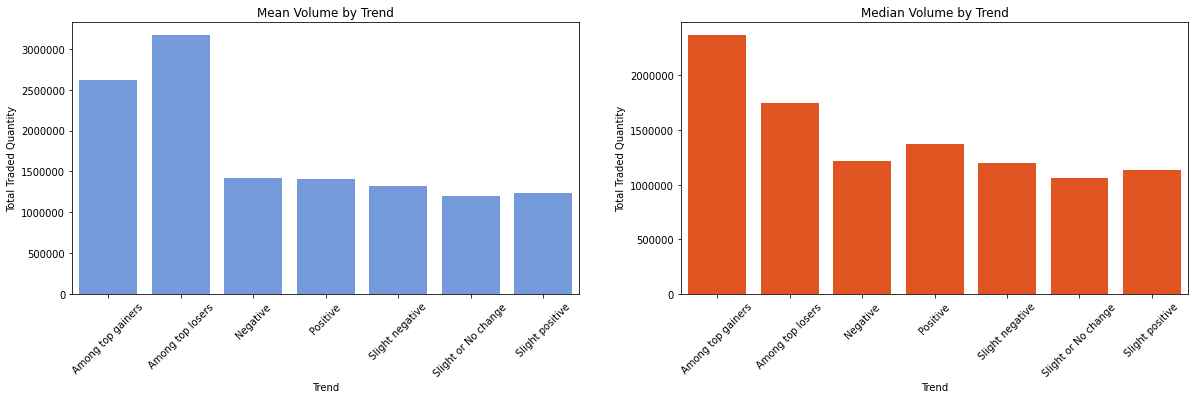

In [66]:
#mean_data = data.groupby('Trend')['Total Traded Quantity'].mean()
volume_by_trend = data.groupby('Trend', as_index=False)['Total Traded Quantity']
fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)

axes[0].set_title("Mean Volume by Trend")
axes[0].ticklabel_format(style='plain')
axes[0].set_xticklabels(data_trend_keys, rotation=45)
sns.barplot(ax=axes[0], x='Trend', y='Total Traded Quantity', data=volume_by_trend.mean(), color='cornflowerblue')

axes[1].set_title("Median Volume by Trend")
axes[1].ticklabel_format(style='plain')
axes[1].set_xticklabels(data_trend_keys, rotation=45)
sns.barplot(ax=axes[1], x='Trend', y='Total Traded Quantity', data=volume_by_trend.median(), color='orangered')

#2.5 Histogram Plot

Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

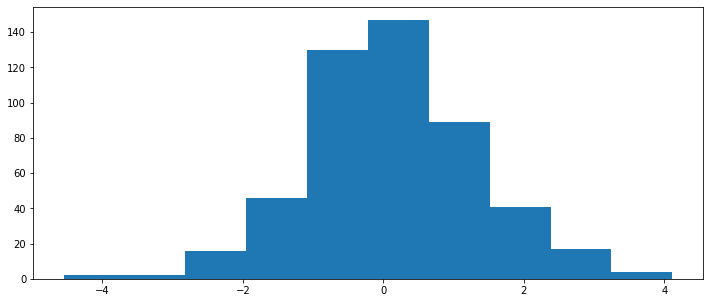

In [67]:
plt.figure(figsize=(12, 5))
plt.hist(data['Day_Perc_Change'])
plt.show()

#2.6 Diversified Pair Plot

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe. Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [68]:
#from google.colab import files
#uploaded = files.upload()

In [69]:
ashoka = pd.read_csv('ASHOKA.csv')
bajaje = pd.read_csv('BAJAJELEC.csv')
bajajf = pd.read_csv('BAJFINANCE.csv')
bombayd = pd.read_csv('BOMDYEING.csv')
castro = pd.read_csv('CASTROLIND.csv')

ashoka.Date = pd.to_datetime(ashoka['Date'])
bajaje.Date = pd.to_datetime(bajaje['Date'])
bajajf.Date = pd.to_datetime(bajajf['Date'])
bombayd.Date = pd.to_datetime(bombayd['Date'])
castro.Date = pd.to_datetime(castro['Date'])

ashoka.set_index('Date', inplace=True)
bajaje.set_index('Date', inplace=True)
bajajf.set_index('Date', inplace=True)
bombayd.set_index('Date', inplace=True)
castro.set_index('Date', inplace=True)


ashoka = ashoka[ashoka['Series']=='EQ']
bajaje = bajaje[bajaje['Series']=='EQ']
bajajf = bajajf[bajajf['Series']=='EQ']
bombayd = bombayd[bombayd['Series']=='EQ']
castro = castro[castro['Series']=='EQ']

data_1 = pd.DataFrame({'ASHOKA':ashoka['Close Price'],
                       'BAJAJELEC':bajaje['Close Price'],
                       'BAJFINANCE':bajajf['Close Price'],
                       'BOMDYEING':bombayd['Close Price'],
                       'CASTROLIND':castro['Close Price']})

data_1_pct = pd.DataFrame({'ASHOKA':ashoka['Close Price'].pct_change()*100,
                       'BAJAJELEC':bajaje['Close Price'].pct_change()*100,
                       'BAJFINANCE':bajajf['Close Price'].pct_change()*100,
                       'BOMDYEING':bombayd['Close Price'].pct_change()*100,
                       'CASTROLIND':castro['Close Price'].pct_change()*100}).dropna()
data_1_pct

,ASHOKA,BAJAJELEC,BAJFINANCE,BOMDYEING,CASTROLIND
Date,,,,,
2017-05-16,-0.532284,1.714788,1.110319,1.459854,-1.522730
2017-05-17,0.977199,0.821326,-1.702838,-1.378897,-0.778781
2017-05-18,-3.387097,-4.501929,-0.773702,-4.012158,-1.274030
2017-05-19,-1.621751,0.628554,-1.932220,-2.279924,0.725890
2017-05-22,-2.254545,-6.826294,-3.645813,-4.082955,-2.779684
...,...,...,...,...,...
2019-05-07,1.766480,-0.017926,-0.568500,-6.505004,-0.167842
2019-05-08,-2.243861,-4.177499,-3.173630,-1.729107,0.806994
2019-05-09,-0.129926,-0.486481,1.713278,-1.340595,-2.101401


The correlation between the percentage changes in the five stocks.

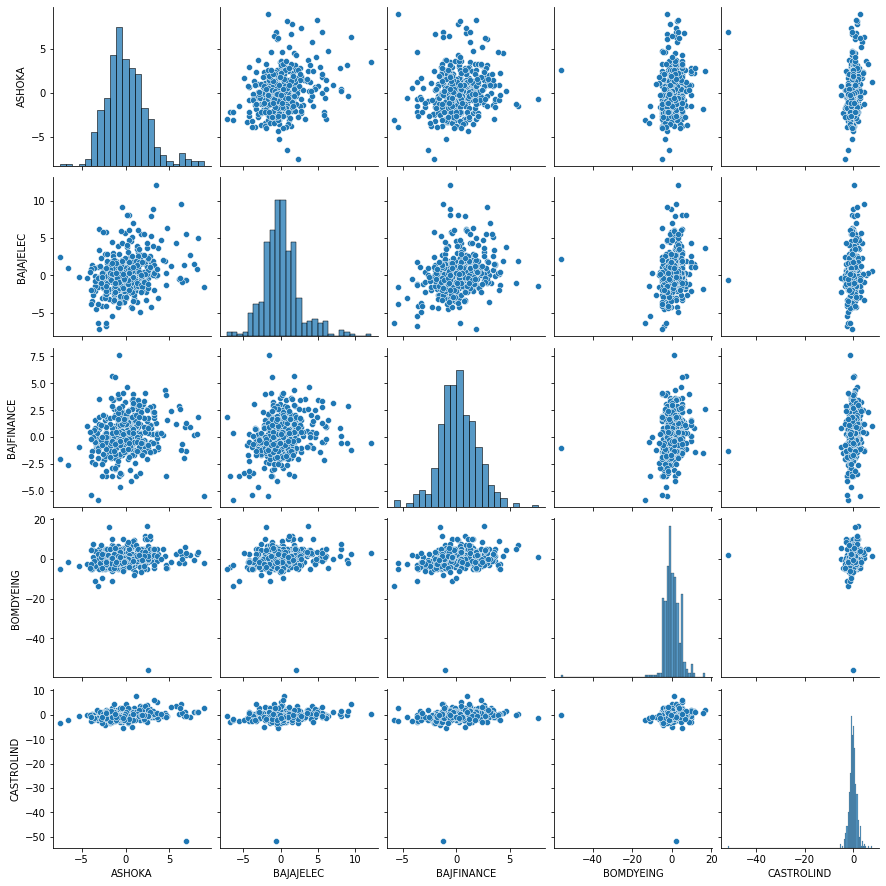

In [70]:
sns.pairplot(data_1_pct)

#2.7 Volatility

Volatility is the change in variance in the returns of a stock over a specific period of time. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values. Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

Seven Day Rolling average of the percentage change of any of the stock prices.

In [71]:
df_ashoka_seven_day_rolling_av = data_1_pct['ASHOKA'].rolling(7, axis=0).mean().dropna()
df_ashoka_seven_day_rolling_av

Date
2017-05-24   -1.373230
2017-05-25   -1.038443
2017-05-26   -1.152987
2017-05-29   -0.658396
2017-05-30   -0.794483
                ...   
2019-05-07   -1.328901
2019-05-08   -1.566908
2019-05-09   -1.424955
2019-05-10   -0.777915
2019-05-13   -0.411828
Name: ASHOKA, Length: 409, dtype: float64

Seven Day Rolling Standard deviation of the percentage change of any of the stock prices.

In [72]:
df_ashoka_seven_day_rolling_std = df_ashoka_seven_day_rolling_av.std()
df_ashoka_seven_day_rolling_std

0.9119682441703667

PLotting the values

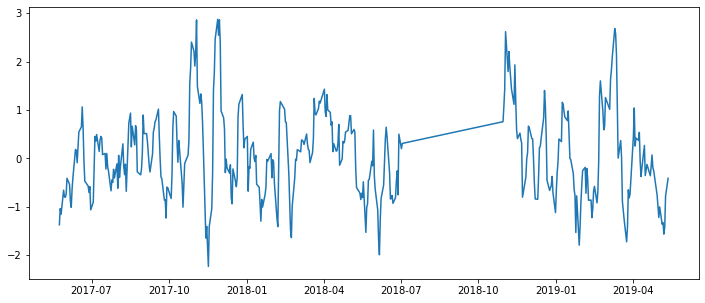

In [73]:
plt.figure(figsize=(12, 5))
plt.plot(df_ashoka_seven_day_rolling_av)
plt.show()

#2.8 Volatility and Beta

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [74]:
#from google.colab import files
#uploaded = files.upload()

[]

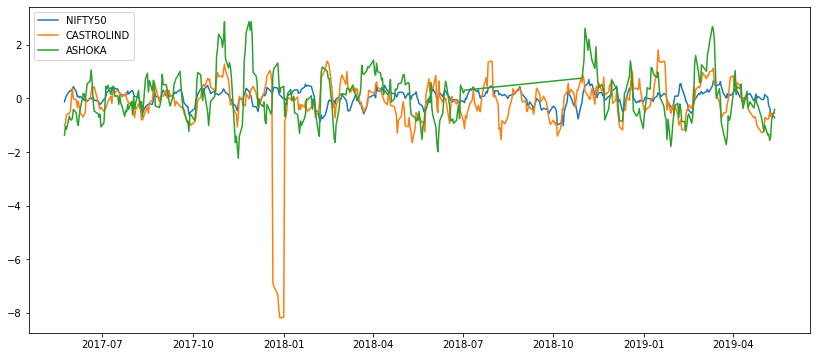

In [75]:
df_nifty = pd.read_csv('Nifty50.csv')
df_nifty.Date = pd.to_datetime(df_nifty.Date)
df_nifty.set_index('Date', inplace=True)

df_nifty_pct = df_nifty['Close'].pct_change().dropna() * 100

df_nifty_rolling_mean = df_nifty_pct.rolling(7, axis=0).mean().dropna()
df_castro_rolling_mean = castro['Close Price'].pct_change().rolling(7, axis=0).mean().dropna() *100

plt.figure(figsize=(14, 6))
plt.plot(df_nifty_rolling_mean, label='NIFTY50')
plt.plot(df_castro_rolling_mean, label='CASTROLIND')
plt.plot(df_ashoka_seven_day_rolling_av, label='ASHOKA')
plt.legend()
plt.plot()

#2.9 Trade Calls - Using Simple Moving Averages.

Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

In [76]:
twenty_one_day_moving_average = ashoka['Close Price'].rolling(21, axis=0).mean().dropna()
thirty_four_day_moving_average = ashoka['Close Price'].rolling(34, axis=0).mean().dropna()


df_trade_calls = pd.DataFrame({'21_day':twenty_one_day_moving_average,
                               '34_day':thirty_four_day_moving_average}).dropna()
df_trade_calls['diff'] = df_trade_calls['21_day']-df_trade_calls['34_day']

df_pos = pd.DataFrame()
df_neg = pd.DataFrame()
for i in range(len(df_trade_calls)-1):
    if df_trade_calls['diff'][i] > df_trade_calls['diff'][i + 1] and df_trade_calls['diff'][i] > 0 and df_trade_calls['diff'][i + 1] < 0:
        df_neg=df_neg.append(df_trade_calls.iloc[i+1])
    if df_trade_calls['diff'][i] < df_trade_calls['diff'][i + 1] and df_trade_calls['diff'][i] < 0 and df_trade_calls['diff'][i + 1] > 0:
        df_pos=df_pos.append(df_trade_calls.iloc[i+1])

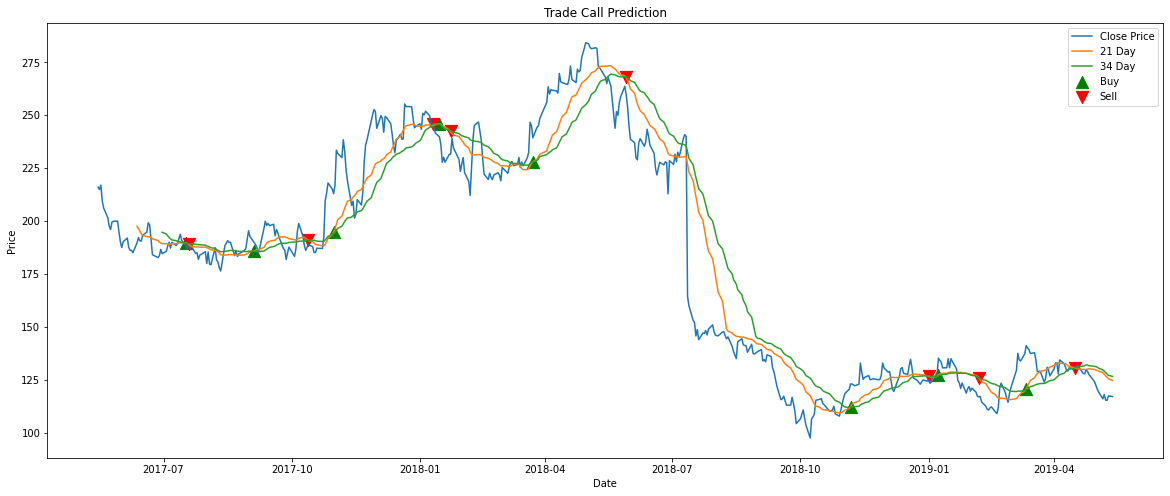

In [77]:
plt.figure(figsize=(20, 8))
plt.plot(ashoka['Close Price'], label='Close Price')
plt.plot(twenty_one_day_moving_average, label='21 Day')
plt.plot(thirty_four_day_moving_average, label='34 Day')
plt.legend()

plt.scatter(df_pos.index, df_pos['21_day'], marker='^',s=150,c='green', label='Buy')
plt.scatter(df_neg.index, df_neg['34_day'], marker='v',s=150,c='red', label='Sell')
plt.legend()
plt.title('Trade Call Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#2.10 Bollinger Bands

Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- The 14 day rolling mean of the closing price (we call it the average) Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Average Daily stock price. Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

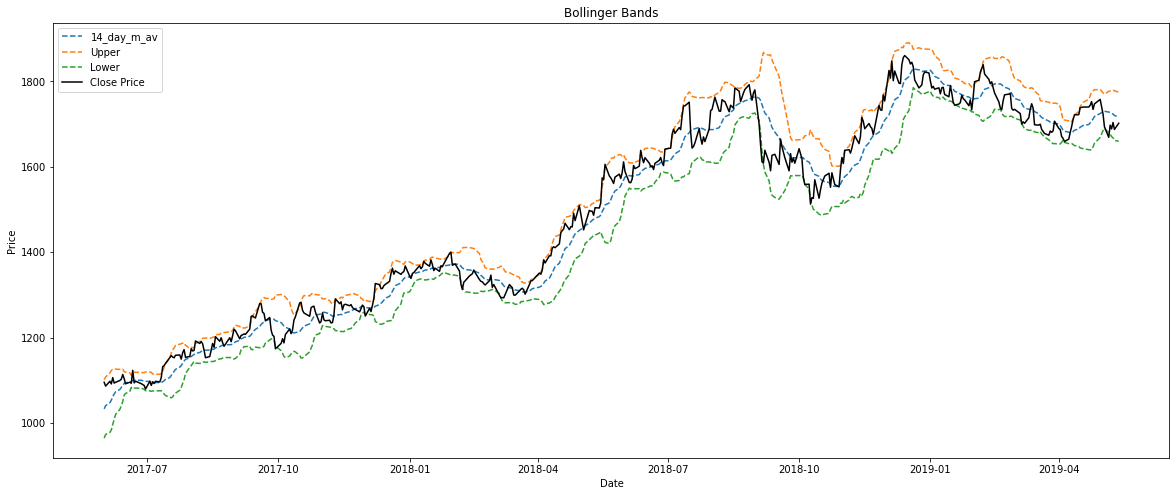

In [78]:
data['14_day_mov_av'] = data['Close Price'].rolling(14).mean().dropna()
data['14_day_mov_std'] = data['Close Price'].rolling(14).std().dropna()

data['Upper Band'] = data['14_day_mov_av'] + 2*data['14_day_mov_std']
data['Lower Band'] = data['14_day_mov_av'] - 2*data['14_day_mov_std']

data.dropna(inplace=True)
plt.figure(figsize=(20, 8))
plt.plot(data['14_day_mov_av'], label='14_day_m_av', linestyle='--')
plt.plot(data['Upper Band'], label='Upper', linestyle='--')
plt.plot(data['Lower Band'], label='Lower', linestyle='--')
plt.plot(data['Close Price'], label='Close Price', color='k')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [79]:
data.to_csv('Module_2_Solutions.csv')